## Giapetto's Woodcarving Problem

### Code by Using Python

### Solve by Using Gurobi

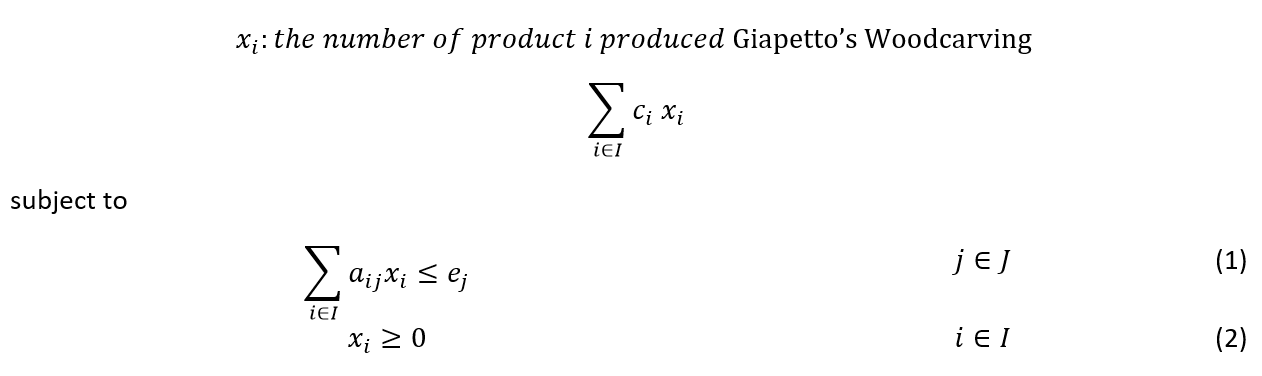

In [26]:
from IPython.display import Image
Image(filename='ClosedForm.png')

### 1. Import Gurobi modeller functions

In [2]:
from gurobipy import*

### 2. Define required parameters

In [3]:
Toys = ["Soldier", "Train"]

Skills = ["Carpentry", "Finishing"]

SkillCapacity = {"Carpentry": 80,
                 "Finishing": 100}

Requirements = {"Soldier": {"Carpentry":1,
                            "Finishing":2},
                "Train": {"Carpentry":1,
                          "Finishing":1}}

Profit = {"Train":2, 
        "Soldier": 3}

### 3. Creates the "m" variable to contain the problem data


In [13]:
m = Model("ToysProblem")

### 4. Define decision variable


In [14]:
XVar = {}
for i in Toys:
    XVar[i] = m.addVar(lb = 0, vtype=GRB.INTEGER)

### 5. Update model


In [15]:
m.update()

### 6. Define objective function

In [16]:
m.setObjective(quicksum(XVar[i]*Profit[i] for i in Toys))

m.modelSense = GRB.MAXIMIZE

### 7. Define Constraints

In [22]:
for j in Skills:
    m.addConstr(quicksum(Requirements[i][j]*XVar[i] for i in Toys) <= SkillCapacity[j])

### 7. Define function which prints the solution of the model

In [23]:
def printSolution():
  if m.status == GRB.status.OPTIMAL:
    print ('\nSolverResult:', m.objVal)
    print ('\nXVar:')
    for i in Toys:
        if XVar[i].x > 0.0001:
          print ('XVar(%s)' % (i), XVar[i].x)
  else:
    print ('No solution')

### 8. Optimize model and print solution

In [24]:
# optimize the model
m.optimize() 

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4 rows, 2 columns and 8 nonzeros
Model fingerprint: 0xfb0d7760
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+01, 1e+02]

Loaded MIP start from previous solve with objective 180

Presolve removed 2 rows and 0 columns
Presolve time: 0.03s
Presolved: 2 rows, 2 columns, 4 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)

Root relaxation: cutoff, 1 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0       180.00000  180.00000  0.00%     -    0s

Explored 0 nodes (1 simplex iterations) in 0.06 seconds
Thread count was 8 (of 8 av

In [25]:
# print objective values that take place in the optimal solution
printSolution() 


SolverResult: 180.0

XVar:
XVar(Soldier) 20.0
XVar(Train) 60.0
